In [68]:
import pandas as pd
import glob
import json
import re
import numpy as np
from IPython.display import display

In [69]:
import os 
def extract_config(line):
    line = line.rstrip(')\n')
    config = re.findall("([a-zA-Z_0-9]+)='?([^,'()]*)'?", line)      
    #print(line)
    #print(config)
    return {k: v for k, v in config}             

def list_dict_reverse(L):
    """ Given a list of dict with identical keys, turn that into a dict of numpy arrays.
    """
    keys = L[0].keys()
    res = {}
    for k in keys:
        res[k] = np.asarray([l[k] for l in L])
    return res

set_fn = set()


def parse_log(fn):
    with open(fn, 'r') as f:
        cfg = extract_config(f.readline())
        train_logs, test_logs = [], []
        for line in f.readlines():
            try:
                parsed = json.loads(line)
            except json.JSONDecodeError:
                continue
            if parsed['mode'] == 'train':
                train_logs.append(parsed)
            elif parsed['mode'] == 'test':
                test_logs.append(parsed)
        train_logs = list_dict_reverse(train_logs)
        test_logs = list_dict_reverse(test_logs)
        return cfg, train_logs, test_logs
        
data = []
data_var = []
for fn in (glob.glob('../res_proto_1rV_adam/*') + glob.glob('../res_proto_1flat_adam/*') +
           glob.glob('../res_proto_1rNP_adam/*') + glob.glob('../res_proto_1flatNP_adam/*') + 
           glob.glob('../res_proto_1rVvaryH_adam/*')
          ):
    if fn[-2:] == '_I' or fn[-5:] == '.json':
        continue
    print("Read", fn)
    if fn in set_fn:
        print("Already parsed", fn)
        continue
    set_fn.add(fn)
    try:
        cfg, tr, te = parse_log(fn)
    except:
        continue

    cfg.update({
        'final_length': te['length'][-1],
        'final_loss': te['loss_objs'][-1],
        'final_H1': te['entropy_1.0'][-1],
        'final_H2': te['entropy_2.0'][-1],
        'final_H3': te['entropy_3.0'][-1],

    })
    for k in te.keys():
        if k.startswith('length'):
            cfg.update({
                'init_' + k: te[k][0],
                'final_' + k: te[k][-1],
            })
            
    try:
        topsim_json = os.path.join(fn + '_I', 'topsim_1on1,sub2,norm.json')
        with open(topsim_json, 'r') as f:
            spearman = json.load(f)
            cfg['spearman'] = spearman['spearman']
            cfg['spearman_ctx'] = spearman['spearman_ctx']
    except Exception as e:
        pass
    try:
        compo_json = os.path.join(fn + '_I', 'compo_.json')
        with open(compo_json, 'r') as f:
            D = json.load(f)
            cfg['compo'] = D['sum_norm']
        print(cfg['compo', fn])
    except Exception as e:
        pass
    try:
        per_arg_H_msg_json = os.path.join(fn + '_I', 'per_arg_H_msg.json')
        with open(per_arg_H_msg_json, 'r') as f:
            D = json.load(f)
            cfg['avg_H'] = float(D['freq_weighted_avg_H'])
            cfg['H0'] = float(D['H_per_msg'][0][2])
            print(cfg['avg_H'])
            # first 10
            def avg_till(n):
                weighted_H = sum([u[1]*u[2] for u in D['H_per_msg'][:n]])
                total = sum([u[1] for u in D['H_per_msg'][:n]])
                return total, weighted_H / float(total)
            n10000, cfg['H10000'] = avg_till(10000)
            print(abs(cfg['avg_H'] - cfg['H10000']) < 0.01)
    except Exception as e:
        pass
    data_var.append(cfg)
df = pd.DataFrame(data_var)

Read ../res_proto_1rV_adam/f65c036b2115e7aaf339eb7bdf00fc5c
0.7911725401135588
True
Read ../res_proto_1rV_adam/64a70f12ba1849524f77d59c72cfb023
1.816491953563625
True
Read ../res_proto_1rV_adam/6513a559c68a629f37a7eb3f027b8e87
1.3835573602814213
True
Read ../res_proto_1rV_adam/802ac044d6c1026384597b7f692b24a3
1.4701190459088207
True
Read ../res_proto_1rV_adam/fbd9e94f092f4af6cb61f129df6adf9d
1.1478827167741885
True
Read ../res_proto_1rV_adam/ae06099131af124f9a45e77a7434de6d
1.7323659185019757
True
Read ../res_proto_1rV_adam/35000b2492598476970f7ea1f29ee209
1.60748646716362
True
Read ../res_proto_1rV_adam/53553846f5bb5ea5a47436d2a47520a9
0.8361074640823783
True
Read ../res_proto_1rV_adam/b13cf7711a3567808e31e7da02aa98e5
1.5984276654572642
True
Read ../res_proto_1rV_adam/1d9e53ae7f0a93dc065eccdc77ecb787
1.3325800234521947
True
Read ../res_proto_1rV_adam/a9118f8eda23b0830cf21c56e7b882b9
1.196307775528163
True
Read ../res_proto_1rV_adam/083b0bde824cc3007257000b834a31f3
1.1052175786988492
T

Read ../res_proto_1flatNP_adam/4668e91c1ce7d1699ecda45b47e2a3cc
1.6461606617357034
True
Read ../res_proto_1flatNP_adam/433351ef69cc6ed0ae96ef3902848a08
2.013855865906474
True
Read ../res_proto_1flatNP_adam/00718986842664fedad8b0c1fa913e91
1.0881836522378736
True
Read ../res_proto_1flatNP_adam/0892eb89a47a9616dc3199405c92c52c
1.76432166067588
True
Read ../res_proto_1flatNP_adam/a5395ab0ecfd65946e8839f0b97a7cd4
1.419260105171451
True
Read ../res_proto_1flatNP_adam/6925434a2e6c0e660d8a0f11cb4bfab1
1.960693865046322
True
Read ../res_proto_1flatNP_adam/649d367b0ac24cf0235127891c8e4da6
1.7870392400746997
True
Read ../res_proto_1flatNP_adam/9a489eb38468f54823acbd6d31a09ad8
1.0494282311489342
True
Read ../res_proto_1flatNP_adam/a3b1da9ae51772405d75cd7a947558c4
1.5640564359624172
True
Read ../res_proto_1flatNP_adam/00b8f11bf860b68279600d3d14219975
1.526844348766707
True
Read ../res_proto_1flatNP_adam/f98c17a16582adf9b6d2138e81956698
1.0262907704631572
True
Read ../res_proto_1flatNP_adam/0b87ed9

In [70]:
df = df.apply(lambda x: pd.to_numeric(x, errors='ignore', downcast='float'))
df['flat_attention'] = df['flat_attention'].fillna('False')
df.columns

Index(['adam_beta2', 'batch_size', 'checkpoint_best', 'checkpoint_dir',
       'checkpoint_freq', 'cuda', 'data', 'dataset', 'train_ratio',
       'valid_ratio', 'dataset_seed', 'shuffle_roles', 'augment',
       'hide_to_send', 'device', 'type', 'distributed_context',
       'is_distributed', 'rank', 'local_rank', 'world_size', 'mode',
       'distributed_port', 'fp16', 'hp', 'sender_nlayers', 'receiver_nlayers',
       'sender_hidden', 'sender_cell', 'receiver_cell', 'dropout',
       'sender_emb', 'max_len', 'vocab_size', 'predict_roleset', 'temperature',
       'ada_len_cost_thresh', 'distance_reg_coef', 'length_cost',
       'flat_attention', 'load_from_checkpoint', 'lr', 'momentum', 'n_epochs',
       'no_cuda', 'no_distributed', 'optimizer', 'patience', 'preemptable',
       'random_seed', 'tensorboard', 'tensorboard_dir', 'update_freq',
       'validation_freq', 'final_length', 'final_loss', 'final_H1', 'final_H2',
       'final_H3', 'init_length', 'init_length_1.0', 'final_len

# Regression

In [76]:
import statsmodels.api as sm

#data = df[(df['final_loss'] < 11.5)]# & (~ df['avg_H'].isna())]# & (df['flat_attention'] == 'False')]
#data = df[(df['final_loss'] < 12.0) & (~ df['spearman'].isna()) &
#          (df['receiver_nlayers'] <= 2.0) & (df['sender_nlayers'] >= 3.0)]
df['flat_attention_dummy'] = (df['flat_attention'] == 'True').astype(float)

data = df[(~ df['avg_H'].isna())]

data['penalty_dummy'] = (data['length_cost'] == 0.0).astype(float)
data['ada_len_dummy'] = (data['ada_len_cost_thresh'].replace(0.0, 20) * data['penalty_dummy'])

data['beta2'] = np.log(data['adam_beta2'])
data['snl2'] = (data['sender_nlayers'] >= 2).astype(float)
data['snl3'] = (data['sender_nlayers'] >= 3).astype(float)
data['snl4'] = (data['sender_nlayers'] >= 4).astype(float)
data['rnl2'] = (data['receiver_nlayers'] >= 2).astype(float)
data['rnl3'] = (data['receiver_nlayers'] >= 3).astype(float)
data['rnl4'] = (data['receiver_nlayers'] >= 4).astype(float)
data['sender_hidden_d'] = (data['sender_hidden'] > 300).astype(float)
data['C'] = data['ada_len_dummy']*data['length_cost']

data['spearman_ctx_abs'] = np.abs(data['spearman_ctx'])
data['spearman_m_ctx'] = data['spearman'] - data['spearman_ctx_abs']

X = data[['temperature', 'beta2', 
         'sender_hidden_d',
         'snl2', 'snl3', 'snl4',
         'rnl2', 'rnl3', 'rnl4',
         'final_H1',
        'final_loss', 
        'final_length', 
        'flat_attention_dummy'
         ]].values
X = sm.add_constant(X)
#print(X.shape)
#print(X)
y = data['avg_H'].values
#print(X.shape, y.shape)
model = sm.OLS(y, X)
res = model.fit(cov_type='HC0')
print(res.summary()), 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     43.06
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           1.55e-42
Time:                        11:28:35   Log-Likelihood:                 62.340
No. Observations:                 155   AIC:                            -96.68
Df Residuals:                     141   BIC:                            -54.07
Df Model:                          13                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0733      0.391     -5.301      0.0

(None,)

# Linearity?

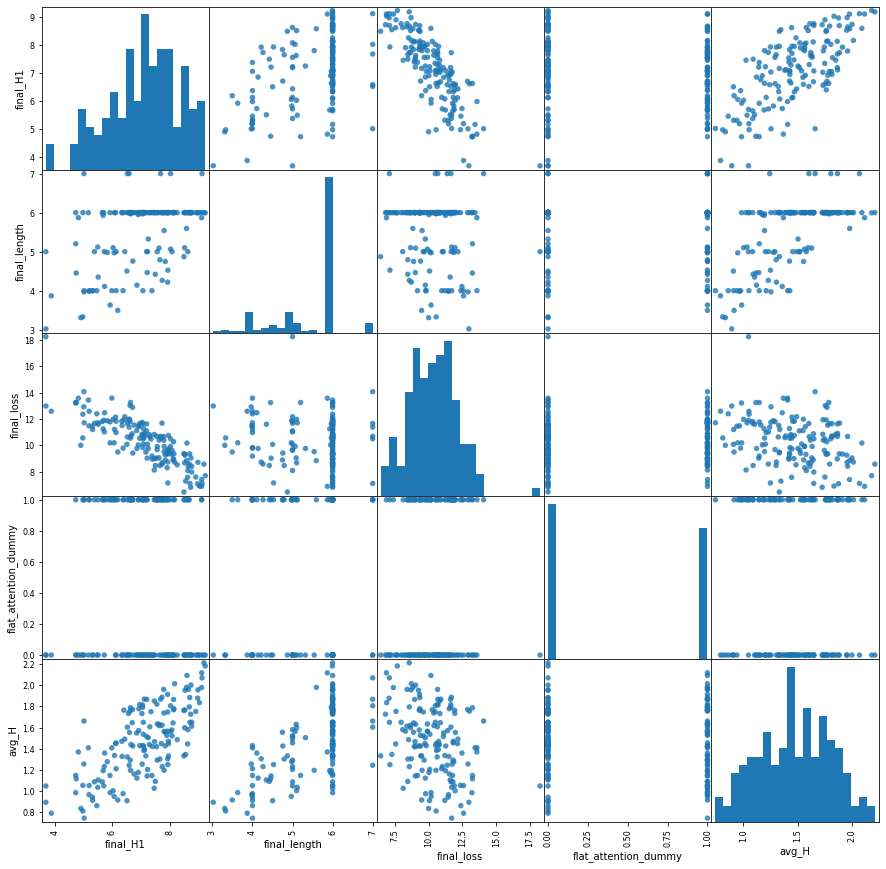

In [61]:
P = pd.plotting.scatter_matrix(
    df[['final_H1',  'final_length', 'final_loss', 'flat_attention_dummy', 'avg_H']],
    figsize=(15, 15), marker='o',
    hist_kwds={'bins': 20}, s=30, alpha=.8
)

# Residuals vs fitted
> When conducting a residual analysis, a "residuals versus fits plot" is the most frequently created plot. It is a scatter plot of residuals on the y axis and fitted values (estimated responses) on the x axis. The plot is used to detect non-linearity, unequal error variances, and outliers.

https://online.stat.psu.edu/stat462/node/117/

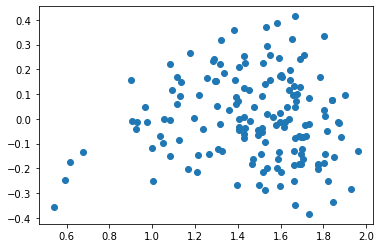

In [75]:
import matplotlib.pyplot as plt 
plt.scatter(res.predict(X), res.predict(X) - y)

# Factors

155
6


final_loss                 final_length  \
                                         mean       std count         mean   
flat_attention ada_len_cost_thresh                                           
False          0.0                   9.731642  1.361268    36     5.999941   
               5.0                   9.983085  1.910706    18     5.372586   
               10.0                 10.839624  2.294761    30     5.014031   
True           0.0                  10.650350  1.523408    26     5.997261   
               5.0                  10.601518  1.472391    22     5.439944   
               10.0                 10.273296  1.890301    23     5.092314   

                                                       avg_H                  \
                                         std count      mean       std count   
flat_attention ada_len_cost_thresh                                             
False          0.0                  0.000262    36  1.620801  0.229393    36   
               5.0                  0.891415    18  1.472523  0.319080    18   
               10.0                 1.007171    30  1.297762  0.325480    30   
True           0.0                  0.013968    26  1.566217  0.303037    26   
               5.0                  0.867375    22  1.448513  0.418128    22   
               10.0                 1.048380    23  1.375612  0.321989    23   

                                        lr  ...       random_seed            \
                                      mean  ... count        mean       std   
flat_attention ada_len_cost_thresh          ...                               
False          0.0                  0.0003  ...    36    1.333333  1.218899   
               5.0                  0.0003  ...    18    2.055556  0.937595   
               10.0                 0.0003  ...    30    1.566667  1.222866   
True           0.0                  0.0003  ...    26    1.461538  1.240347   
               5.0                  0.0003  ...    22    1.727273  1.162174   
               10.0                 0.0003  ...    23    1.478261  1.201119   

                                         adam_beta2                  \
                                   count       mean       std count   
flat_attention ada_len_cost_thresh                                    
False          0.0                    36   0.968250  0.043102    36   
               5.0                    18   0.945500  0.046864    18   
               10.0                   30   0.966600  0.044507    30   
True           0.0                    26   0.965423  0.044643    26   
               5.0                    22   0.958091  0.045019    22   
               10.0                   23   0.970043  0.042730    23   

                                   temperature                  
                                          mean       std count  
flat_attention ada_len_cost_thresh                              
False          0.0                    1.008333  0.138099    36  
               5.0                    1.075000  0.148769    18  
               10.0                   1.065000  0.148643    30  
True           0.0                    0.990385  0.135661    26  
               5.0                    1.052273  0.144319    22  
               10.0                   1.084783  0.165443    23  

[6 rows x 21 columns]

<AxesSubplot:xlabel='final_length', ylabel='avg_H'>

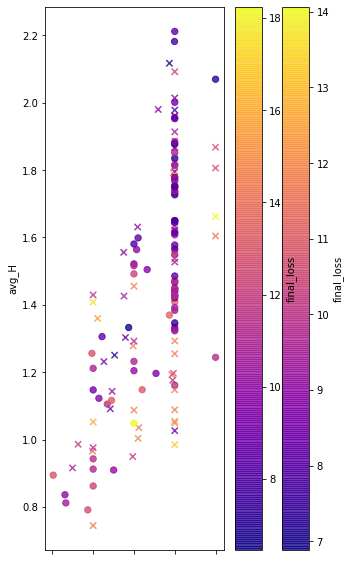

In [63]:
metric = 'avg_H'

fields = ['final_loss', 'final_length', metric, 'lr', 'random_seed',
          'adam_beta2', 'ada_len_cost_thresh', 'flat_attention', 'optimizer', 'temperature']

criterion_1 = (df['mode'] == 'gs')
# criterion_2 = (df['optimizer'] == 'adam')
#criterion_3 = (df['train_test_ratio'] == '-1.0')
print(len(df.loc[criterion_1]))
a = df.loc[criterion_1][fields].groupby(['flat_attention',  'ada_len_cost_thresh'])
print(len(a))
print(a)
display(a.agg(['mean', 'std', 'count']))
df['size'] = df['sender_nlayers']*df['receiver_nlayers'] *10

ax = df.loc[df['flat_attention'] == 'True'].plot.scatter(x = 'final_length', y = metric, c='final_loss',
                    s = 40, marker='x',
                    alpha=0.8, colormap='plasma', figsize=(5,10));
df.loc[df['flat_attention'] == 'False'].plot.scatter(x = 'final_length', y = metric, c='final_loss',
                    s = 40, marker='o',
                    alpha=0.8, colormap='plasma', ax=ax, sharex=True, sharey=True)

<AxesSubplot:xlabel='final_loss', ylabel='H10000'>

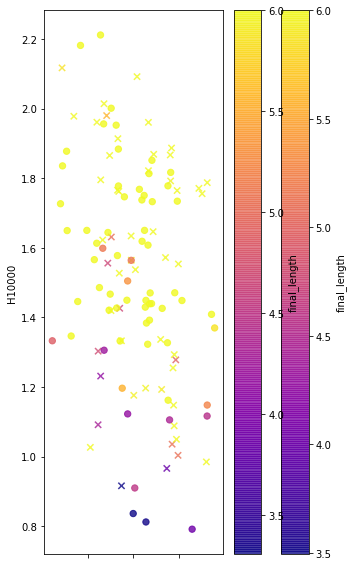

In [907]:

#plt.figure()
ax = df.loc[df['flat_attention'] == 'True'].plot.scatter(x = 'final_loss', y = metric, c='final_length',
                    s = 40, marker='x',
                    alpha=0.8, colormap='plasma', figsize=(5,10))
df.loc[df['flat_attention'] == 'False'].plot.scatter(x = 'final_loss', y = metric, c='final_length',
                    s = 40, marker='o',
                    alpha=0.8, colormap='plasma', ax=ax, sharex=True, sharey=True)

### Does flat attention help for final loss too?

In [247]:
import statsmodels.api as sm

data = df[df['final_loss'] < 10.0]
data['flat_attention_dummy'] = (data['flat_attention'] == 'True').astype(float)
data['penalty_dummy'] = (data['length_cost'] == 0.0).astype(float)
data['beta2'] = np.log(data['adam_beta2'])
X = data[['beta2', 'sender_nlayers', 'receiver_nlayers',
        'final_length', 
        'length_cost', 'ada_len_cost_thresh',
       'flat_attention_dummy']].values
X = sm.add_constant(X)
#print(X)
y = data['final_loss'].values
#print(X.shape, y.shape)
model = sm.OLS(y, X)
res = model.fit()
print(res.summary()), 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     2.690
Date:                Thu, 01 Jul 2021   Prob (F-statistic):             0.0193
Time:                        12:43:53   Log-Likelihood:                -64.911
No. Observations:                  57   AIC:                             145.8
Df Residuals:                      49   BIC:                             162.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3007      1.961      6.272      0.0

/media/Docs/miniconda3/envs/egg/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/media/Docs/miniconda3/envs/egg/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/media/Docs/miniconda3/envs/egg/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

(None,)

# Checking assumptions
First, let's see if residuals are normally distributed.

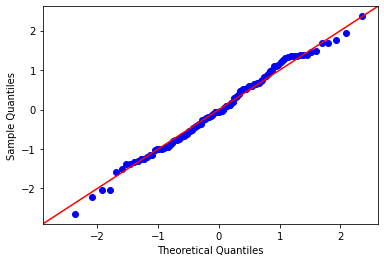

In [930]:
fig = sm.qqplot(res.resid, fit=True, line="45")

What about variance?